In [1]:
import json
import sys
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from s4hci.utils.data_handling import load_adi_data, save_as_fits

# All files we need

In [21]:
# 1.) Load the arguments
dataset_hdf5_file = "/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5"

# Load the data

In [22]:
science_data, _, _ = \
    load_adi_data(
        hdf5_dataset=dataset_hdf5_file,
        data_tag="object",
        psf_template_tag="psf_template",
        para_tag="header_object/PARANG")

science_data = science_data[:, 12:-12, 12:-12]

# Implement mask function

In [37]:
from photutils.aperture import CircularAperture

In [44]:
def construct_central_mask(
    frame_size,
    central_mask_size_radius):
    
    image_center = (frame_size - 1) / 2.

    aperture = CircularAperture(
        positions=(image_center, image_center),
        r=central_mask_size_radius)
    
    template_mask = aperture.to_mask().to_image((frame_size, frame_size))
    return 1 - template_mask

   

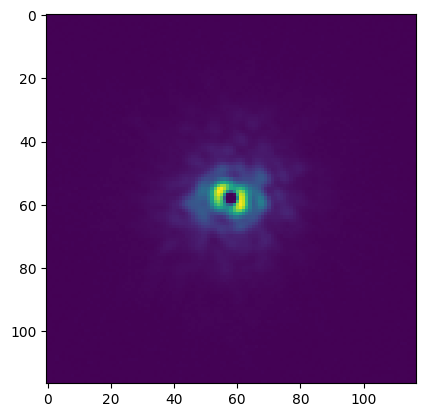

In [47]:
plt.imshow(construct_central_mask(science_data.shape[-1], 3.8/2) * science_data[100])

In [48]:
construct_central_mask(science_data.shape[-1], 3.8/2)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
 mask = np.ones((frame_size, frame_size))
    inner_size = np.ceil(central_mask_size_radius)

    if frame_size % 2 == 0:
        x_grid = y_grid = np.linspace(-frame_size / 2 + 0.5,
                                      frame_size / 2 - 0.5, frame_size)
    else:
        x_grid = y_grid = np.linspace(-(frame_size - 1) / 2,
                                      (frame_size - 1) / 2, frame_size)

    xx_grid, yy_grid = np.meshgrid(x_grid, y_grid)
    rr_grid = np.sqrt(xx_grid ** 2 + yy_grid ** 2)

    mask[rr_grid < inner_size] = 0.

    return mask